In [1]:
from custom_functions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Find Eq with b = 0.1, g = 0.3

In [2]:
def f1(x_arr, b, g):
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z

    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])

def userf1(t, x_arr, p):
    '''2D ODE system for the AMOC
    Input
    t  : float
        time value
    x  : array (2, N)
        state space values
    p  : array (2,)
        parameter values
    
    
    Returns
    xout: array, shape (2, N)
           Array containing derivative at x
           2nd dimension denotes derivatives for different points
    '''
    
    if x_arr.ndim == 1:
        x_arr = np.expand_dims(x_arr, axis=1)
    
    n = x_arr.shape
    xout = np.empty(n)
    xout[:] = np.nan 

    b = p[0,]
    g = p[1,]
    
    
    b = 1
    xout[0,:] = x_arr[0, :] - (x_arr[0, :]**2)*np.exp(-b*x_arr[0, :]*x_arr[1, :])
    xout[1,:] = x_arr[1, :] - (x_arr[1, :]**2)*np.exp(-g*x_arr[0, :])
    return xout

In [8]:
def function_being_used(x0):
    b = 0.1
    g = 0.3
    return f1(x0, b, g)


def df(x):
    h = 1e-06
    J = MyJacobian(function_being_used, x, h)
    J = np.squeeze(J, axis = 2)
    return J
    
def grid_of_coords(max_x_val, increment):
    x=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))
    y=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))

    xx,yy=np.meshgrid(x,y)
    coords=np.array((xx.ravel(), yy.ravel())).T
    return coords

def bin_repeats(points, threshold):

    # Function to calculate the distance between two points
    def distance(point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    # Create a mask for points to keep
    keep_mask = np.ones(len(points), dtype=bool)

    # Iterate through the points and filter based on the threshold
    for i in range(len(points)):
        if keep_mask[i]:
            for j in range(i + 1, len(points)):
                if distance(points[i], points[j]) < threshold:
                    keep_mask[j] = False

    # Use the mask to filter the points and create a 2D NumPy array
    return points[keep_mask] 

### Loop through a grip of points and bin the repeated equilibrium points

In [10]:
x0 = np.array([0, 1.])
tol = 1e-8
maxit = 100

coords = grid_of_coords(10, 0.25)
eqlib_list = np.empty(shape=[0, 2])

for i in coords:
    x , converged , jacobian = MySolve(function_being_used, i, df, tol, maxit)
    
    if converged:
        x = np.squeeze(x, axis = 1)
        eqlib_list = np.append(eqlib_list, np.array([x]), axis=0)

print(bin_repeats(eqlib_list, 1e-5))
equlib_list = bin_repeats(eqlib_list, 1e-5)


C:\Users\aaron\AppData\Local\Temp\ipykernel_31040\1078167138.py:4: RuntimeWarning: overflow encountered in exp
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])


matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
matrix is singular
[[ 0.00000000e+00 -1.86191570e-22]
 [ 1.00000000e+00  0.00000000e+00]
 [-2.64213399e-18  1.00000000e+00]
 [ 1.18399237e+00  1.42646265e+00]
 [ 4.11586338e+00  3.43755002e+00]]


## Determine stability
For b = 0.1 and g = 0.3 the equilibrium points are $x_{l1} = [ 1.184, 1.426]$ and $x_{l2} = [ 4.116, 3.438]$

[[ 0.00000000e+00 -1.86191570e-22]
 [ 1.00000000e+00  0.00000000e+00]
 [-2.64213399e-18  1.00000000e+00]
 [ 1.18399237e+00  1.42646265e+00]
 [ 4.11586338e+00  3.43755002e+00]]


[8.12862606e+42 1.88548325e+42]


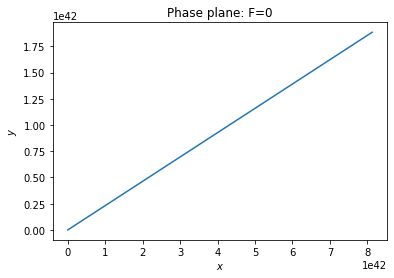

In [6]:
# Define parameters p
b = 0.1; g = 0.3; p = np.array([b, g])

#define variable to go into MyIVP
x0 = np.array([1.5,0.2])
tspan = [0,100]
h = 0.01

#call MyIVP
[X,t,xeq1] = MyIVP(lambda t,x:userf1(t,x,p),x0,tspan,h)
X = np.squeeze(X)
xeq1 = np.squeeze(xeq1)
print(xeq1)

#Plot
plt.plot(X[0,:],X[1,:])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Phase plane: F=0")

plt.show()